<a href="https://colab.research.google.com/github/joramirez-analista-datos/portafolio/blob/main/U9_Sesion3_ejercicios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 📘 **Unidad 9 - Sesión 3: Ejercicios Prácticos de Visualización de Datos**
En esta sesión aprenderás a representar visualmente relaciones y comparaciones entre variables utilizando **Seaborn** y **Matplotlib**.

Incluye:
1. Gráfico de Dispersión con Línea de Tendencia  
2. Gráfico de Barras Apiladas para Comparar el Gasto Mensual por Región



## 🧮 **Ejercicio 1: Gráfico de Dispersión con Línea de Tendencia**

En este ejercicio, trabajarás con el conjunto de datos `datos_comparacion.csv`.  
Utilizarás la biblioteca **Seaborn** para generar un gráfico de dispersión que muestre la relación entre **Edad** e **Ingreso Mensual**, agregando una línea de tendencia para observar el patrón de correlación.

📂 **Fuente de datos:**  
👉 [Descargar archivo datos_comparacion.csv](https://drive.google.com/uc?export=download&id=1VbrQjDF2Br0tjHHiruUnp-0qmnQwon1I)


In [ ]:

# Paso 1: Importar las bibliotecas necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Paso 2: Cargar los datos
url = "https://drive.google.com/uc?export=download&id=1VbrQjDF2Br0tjHHiruUnp-0qmnQwon1I"
df = pd.read_csv(url)

# Paso 3: Verificar las primeras filas
df.head()


,Cliente_ID,Edad,Ingreso Mensual,Gasto Mensual,Puntuacion de credito,Region
0,1,40,9311.00,4668.80,563,Oeste
1,2,35,6773.72,716.97,591,Este
2,3,19,6905.44,723.16,840,Norte
3,4,23,4122.59,6409.51,487,Este
4,5,19,3184.45,6186.34,743,Norte


In [ ]:

# Paso 4: Asegurar tipos de datos correctos
df["Edad"] = pd.to_numeric(df["Edad"], errors="coerce")
df["Ingreso Mensual"] = pd.to_numeric(df["Ingreso Mensual"], errors="coerce")

# Eliminar valores nulos
df = df.dropna(subset=["Edad", "Ingreso Mensual"])


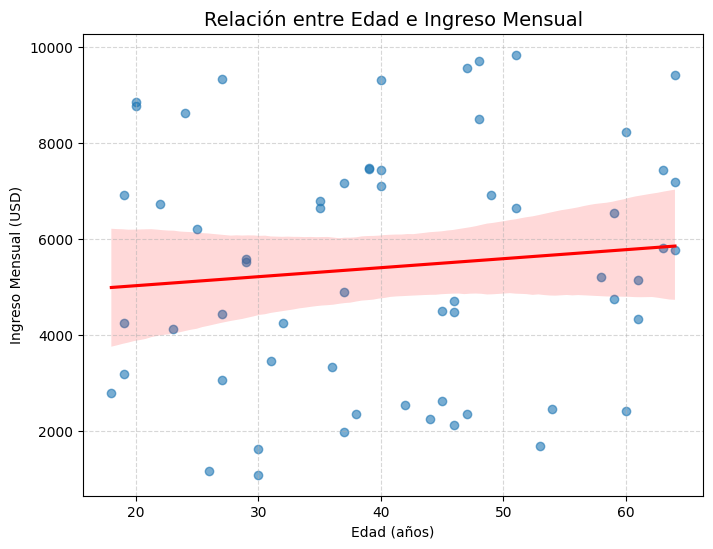

In [ ]:

# Paso 5: Crear gráfico de dispersión con línea de tendencia
plt.figure(figsize=(8,6))
sns.regplot(x="Edad", y="Ingreso Mensual", data=df, scatter_kws={"alpha":0.6}, line_kws={"color":"red"})
plt.title("Relación entre Edad e Ingreso Mensual", fontsize=14)
plt.xlabel("Edad (años)")
plt.ylabel("Ingreso Mensual (USD)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()



### 📊 **Análisis del gráfico**
- Cada punto representa una persona (Edad vs Ingreso Mensual).  
- La línea roja indica la tendencia:  
  - **Positiva:** mayores ingresos con más edad.  
  - **Negativa:** ingresos decrecen con la edad.  
  - **Plana:** sin correlación significativa.



## 🔢 **Ejercicio 2: Gráfico de Barras Apiladas para Comparar el Gasto Mensual por Región**

En este ejercicio, usarás el mismo archivo `datos_comparacion.csv`.  
Utilizarás **Seaborn** y **Matplotlib** para generar un gráfico de barras apiladas que muestre el **Gasto Mensual promedio en cada Región**, permitiendo comparar visualmente las diferencias.

📂 **Fuente de datos:**  
👉 [Descargar archivo datos_comparacion.csv](https://drive.google.com/uc?export=download&id=1VbrQjDF2Br0tjHHiruUnp-0qmnQwon1I)


,Region,Tipo,Gasto Mensual
0,Este,Hogar,4693.252222
1,Este,Ocio,2863.480000
2,Este,Transporte,3360.480000
3,Norte,Hogar,5882.300000
4,Norte,Ocio,5116.205000
5,Norte,Transporte,4032.513333
6,Oeste,Hogar,3401.286667
7,Oeste,Ocio,4493.916667
8,Oeste,Transporte,3659.611667
9,Sur,Hogar,3603.727500


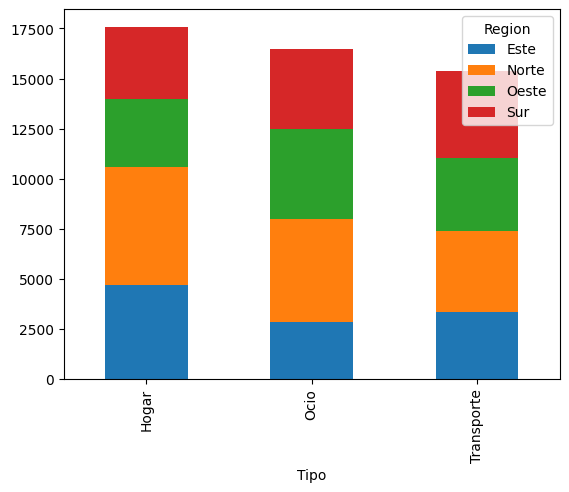

In [ ]:

import numpy as np
# Paso 1: Cargar los datos nuevamente (si es necesario)
url = "https://drive.google.com/uc?export=download&id=1VbrQjDF2Br0tjHHiruUnp-0qmnQwon1I"
df = pd.read_csv(url)
tipos_gasto = ['Hogar', 'Transporte', 'Ocio']
df["Tipo"]=np.random.choice(tipos_gasto, size=len(df))

#Paso 2: Asegurar tipos de datos
df["Region"] = df["Region"].astype(str)
df["Gasto Mensual"] = pd.to_numeric(df["Gasto Mensual"], errors="coerce")

df.head()
# Paso 3: Calcular promedio de gasto por región
gasto_region = df.groupby(['Region','Tipo'])["Gasto Mensual"].mean().reset_index()
pvt=gasto_region.pivot(index='Tipo', columns='Region', values='Gasto Mensual')
pvt.plot(kind='bar', stacked=True)
#gasto_region = gasto_region.sort_values("Gasto Mensual", ascending=False)
gasto_region


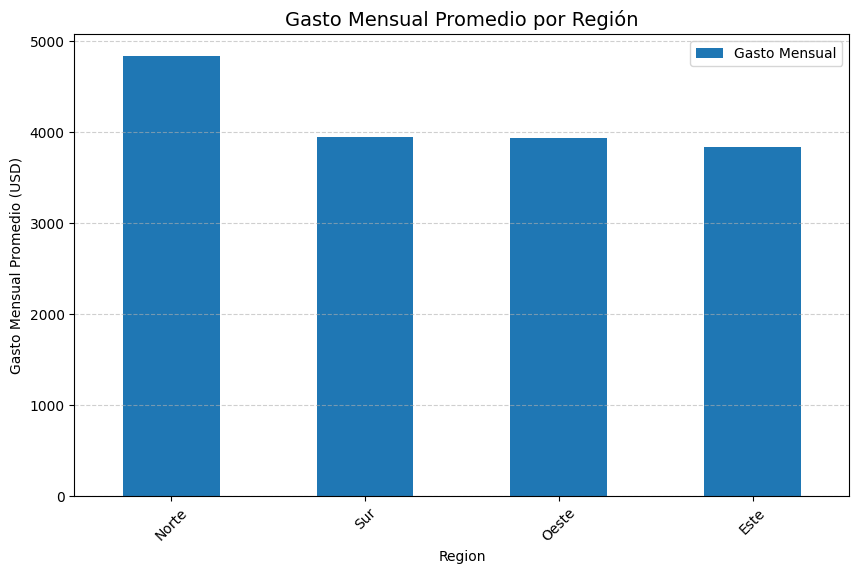

In [ ]:

# Paso 4: Crear gráfico de barras
plt.figure(figsize=(10,6))
#sns.barplot(x="Region", y="Gasto Mensual", data=gasto_region, palette="viridis")
plt.title("Gasto Mensual Promedio por Región", fontsize=14)
gasto_region.set_index("Region").plot(kind="bar", stacked=True, ax=plt.gca())

plt.xlabel("Region")
plt.ylabel("Gasto Mensual Promedio (USD)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
#plt.tight_layout()
plt.show()



### 📈 **Conclusión**
- Las regiones con mayor gasto mensual se observan fácilmente por la altura de las barras.  
- Si el dataset tuviera subcategorías (como género o edad), podrías apilar valores usando `plt.bar()` y una leyenda para diferenciar segmentos.  
- Este tipo de gráfico es ideal para comparaciones agregadas entre grupos.



## 🔢 **Ejercicio 3: Histograma Doble para Visualizar la Distribución del Ingreso y Gasto Mensual**

En este ejercicio, trabajarás con el conjunto de datos almacenado en el archivo `datos_comparacion.csv`.  
Utilizarás **Seaborn** y **Matplotlib** para generar un **histograma doble**, permitiendo visualizar y comparar la distribución de **Ingreso Mensual** y **Gasto Mensual** en un mismo gráfico.

📂 **Fuente de datos:**  
👉 [Descargar archivo datos_comparacion.csv](https://drive.google.com/uc?export=download&id=1VbrQjDF2Br0tjHHiruUnp-0qmnQwon1I)



### 🎯 **Objetivos del ejercicio**
✅ Cargar los datos desde el archivo `datos_comparacion.csv` en un DataFrame de pandas.  
✅ Asegurar que las columnas **Ingreso Mensual** y **Gasto Mensual** estén correctamente definidas como valores numéricos.  
✅ Utilizar **Seaborn** y **Matplotlib** para generar un **histograma doble**, donde:
- Se representen ambas distribuciones en un mismo gráfico con diferentes colores.  
- Se utilicen transparencias (`alpha`) para facilitar la comparación visual.  
- Se incluya una **leyenda** para identificar ambas variables.  
✅ Mostrar el gráfico para analizar las diferencias en la distribución del Ingreso Mensual y el Gasto Mensual.


In [ ]:

# Paso 1: Importar las bibliotecas necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Paso 2: Cargar los datos desde el enlace de Google Drive
url = "https://drive.google.com/uc?export=download&id=1VbrQjDF2Br0tjHHiruUnp-0qmnQwon1I"
df = pd.read_csv(url)

# Paso 3: Verificar las primeras filas
df.head()


In [ ]:

# Paso 4: Asegurar tipos de datos correctos
df["Ingreso Mensual"] = pd.to_numeric(df["Ingreso Mensual"], errors="coerce")
df["Gasto Mensual"] = pd.to_numeric(df["Gasto Mensual"], errors="coerce")

# Eliminar valores nulos
df = df.dropna(subset=["Ingreso Mensual", "Gasto Mensual"])


In [ ]:

# Paso 5: Crear el histograma doble
plt.figure(figsize=(10,6))
sns.histplot(df["Ingreso Mensual"], color="blue", kde=True, label="Ingreso Mensual", alpha=0.5, bins=20)
sns.histplot(df["Gasto Mensual"], color="orange", kde=True, label="Gasto Mensual", alpha=0.5, bins=20)

plt.title("Distribución del Ingreso y Gasto Mensual", fontsize=14)
plt.xlabel("Monto (USD)")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()



### 📊 **Análisis del gráfico**
- Este histograma doble permite comparar visualmente las distribuciones de **Ingreso** y **Gasto Mensual**.  
- Si las curvas se solapan mucho, indica que los valores son similares.  
- Si están separadas, sugiere diferencias significativas en el nivel de ingresos y gastos promedio.  
- Las transparencias (`alpha`) ayudan a observar las zonas donde ambas distribuciones coinciden.



## 📦 **Ejercicio 4: Boxplot y Swarmplot para Analizar la Relación entre Puntuación de Crédito e Ingreso Mensual**

En este ejercicio, trabajarás con el conjunto de datos `datos_comparacion.csv`.  
Usarás **Seaborn** y **Matplotlib** para generar un **boxplot** combinado con un **swarmplot**, con el fin de analizar la relación entre **Puntuación de Crédito** e **Ingreso Mensual**.

📂 **Fuente de datos:**  
👉 [Descargar archivo datos_comparacion.csv](https://drive.google.com/uc?export=download&id=1VbrQjDF2Br0tjHHiruUnp-0qmnQwon1I)



### 🎯 **Objetivos del ejercicio**
✅ Cargar los datos desde `datos_comparacion.csv` en un DataFrame de pandas.  
✅ Asegurar que las columnas **"Puntuación de Crédito"** e **"Ingreso Mensual"** estén como valores numéricos.  
✅ Generar un **boxplot** donde:
- **Eje X**: Puntuación de Crédito (agrupada por rangos).  
- **Eje Y**: Ingreso Mensual.  
✅ Superponer un **swarmplot** para visualizar observaciones individuales.  
✅ Analizar la relación entre Puntuación de Crédito e Ingreso Mensual.


In [ ]:

# Paso 1: Importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Paso 2: Cargar datos
url = "https://drive.google.com/uc?export=download&id=1VbrQjDF2Br0tjHHiruUnp-0qmnQwon1I"
df = pd.read_csv(url)

# Paso 3: Asegurar tipos numéricos
df["Puntuación de Crédito"] = pd.to_numeric(df["Puntuación de Crédito"], errors="coerce")
df["Ingreso Mensual"] = pd.to_numeric(df["Ingreso Mensual"], errors="coerce")

# Eliminar nulos relevantes
df = df.dropna(subset=["Puntuación de Crédito", "Ingreso Mensual"])

# Nota: Para usar boxplot de forma interpretable, agrupamos la Puntuación de Crédito en rangos
bins = [0, 600, 700, 800, 1000]
labels = ["≤600 (Riesgo)", "601-700 (Medio)", "701-800 (Bueno)", "≥801 (Excelente)"]
df["Rango Crédito"] = pd.cut(df["Puntuación de Crédito"], bins=bins, labels=labels, include_lowest=True)

# Orden consistente en el eje X
order = labels


In [ ]:

# Paso 4: Boxplot + Swarmplot
plt.figure(figsize=(10,6))

# Boxplot (sin outliers para que el swarmplot no tape)
sns.boxplot(data=df, x="Rango Crédito", y="Ingreso Mensual", order=order, showfliers=False)

# Swarmplot (puntos individuales)
sns.swarmplot(data=df, x="Rango Crédito", y="Ingreso Mensual", order=order, size=3, alpha=0.6, color="k")

plt.title("Ingreso Mensual por Rangos de Puntuación de Crédito", fontsize=14)
plt.xlabel("Rangos de Puntuación de Crédito")
plt.ylabel("Ingreso Mensual (USD)")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()



### 📊 **Análisis sugerido**
- El **boxplot** resume la distribución por rango (mediana, cuartiles y dispersión).  
- El **swarmplot** revela la **densidad** y posibles **grupos** o **outliers**.  
- Esperarías que rangos de crédito más altos muestren **ingresos medianos** mayores, aunque pueden existir superposiciones.  
- Si ves mucha superposición entre rangos, podrían intervenir otros factores (antigüedad laboral, sector, deudas, etc.).
